# 1. Les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pip install openpyxl

# 2. Importation des données

In [2]:
#missing_values = ["bon-cadeau-25-euros", "na", "/", "--", "n/a"]
data_erp = pd.read_excel(r"C:\Users\diarr\Downloads\P5\erp.xlsx")
data_web = pd.read_excel(r"C:\Users\diarr\Downloads\P5\web.xlsx")
data_liaison = pd.read_excel(r"C:\Users\diarr\Downloads\P5\liaison.xlsx")

## 2.1. Exploration et analyse des données

* Dans cette étape nous allons explorer une par une toutes les DataFrames pour en extraire des informations , revoir la structure des données ainsi faire une courte analyse par la suite.

### 2.1.1 Dataframe data_erp

In [3]:
# Lecture du dataframe
data_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# la dimension du dataframe 
data_erp.shape

(825, 5)

* Nous avions un dataframe de 825 lignes(enregistrements) et 5 colonnes.

In [5]:
# Typages de données
info = data_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
# convertir au bon format
data_erp["product_id"] = data_erp["product_id"].astype(object)
data_erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [7]:
# Vérifier les doublons
data_erp[data_erp.duplicated()]

,product_id,onsale_web,price,stock_quantity,stock_status


In [8]:
# Vérifier les doublons
data_erp[data_erp.duplicated(["product_id"])]

,product_id,onsale_web,price,stock_quantity,stock_status


In [9]:
# Vérifier les valeurs manquantes
pourcentage_valeur_null = (data_erp.isnull().sum()/data_erp.shape[0]*100).sort_values(ascending=False)
pourcentage_valeur_null

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

In [10]:
# Statistiques descriptives
statistique = data_erp.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
onsale_web,825.0,0.869091,0.337506,0.0,1.0,1.0,1.0,1.0
price,825.0,32.415636,26.795849,5.2,14.6,24.4,42.0,225.0
stock_quantity,825.0,26.496970,45.892422,0.0,1.0,11.0,34.0,578.0


In [11]:
data_erp['product_id'].nunique()

825

* Après exploration des données, on voit que notre dataframe n'a pas de doublons, les colonnes sont au bon format, ainsi nous n'avions pas trouvé de valeurs manquantes.

In [12]:
#data_erp['stock_quantity'].unique()

### 2.1.2 "Dataframe data_web"

In [13]:
# afficher toutes nos colonnes de chaque variable
pd.set_option("display.max_column",28)
#missing_values = ["bon-cadeau-25-euros", "na"]

# Lecture des données
data_web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
# Dimension du dataframe
data_web.shape

(1513, 28)

* Nous avions un dataframe avec 1513 lignes et 28 colonnes.

In [15]:
# Typages de données
info = data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [16]:
# Vérifier les doublons
# data_web.loc[data_web['tax_class'].duplicated(keep=False),:]
data_web[data_web.duplicated(["sku"])].shape

(798, 28)

In [17]:
# afficher les différentes modalités
data_web['sku'].nunique()

714

In [18]:
# vérification avec l'index 
data_web[data_web['sku'] == 15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


* On voit avec la colonne "post_type" qu'on a deux type d'arguments l'une qui fait référence aux produit at l'autre une pièce jointe, dans ce cas nous allons garder seulement les lignes avec "product" car si on ne conserve pas seulement les lignes avec les "product", lors de la suppression des doublons , il peut y garder des lignes qui font références aux pièces jointes alors qu'on en a pas besoin.

In [19]:
# On ne conserve que les lignes avec "product"
data_web = data_web[data_web['post_type'] =='product']

# On observe
print(data_web.shape)
data_web.head(2)

(716, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [20]:
# Suppression des doublons
data_web = data_web.drop_duplicates(["sku"])
data_web.shape

(715, 28)

In [21]:
# Vérifier les valeurs manquantes
pourcentage_valeur_null = (data_web.isnull().sum()/data_web.shape[0]*100).sort_values(ascending=False)
pourcentage_valeur_null

post_mime_type           100.00000
tax_class                100.00000
post_content_filtered    100.00000
post_content             100.00000
post_password            100.00000
sku                        0.13986
comment_status             0.00000
post_type                  0.00000
menu_order                 0.00000
guid                       0.00000
post_parent                0.00000
post_modified_gmt          0.00000
post_modified              0.00000
post_name                  0.00000
ping_status                0.00000
post_status                0.00000
virtual                    0.00000
post_excerpt               0.00000
post_title                 0.00000
post_date_gmt              0.00000
post_date                  0.00000
post_author                0.00000
tax_status                 0.00000
total_sales                0.00000
average_rating             0.00000
rating_count               0.00000
downloadable               0.00000
comment_count              0.00000
dtype: float64

* Le code SKU « Stock Keeping Unit » ou UGS (Unité de Gestion de Stock) est un numéro unique utilisé pour le suivi interne des stocks d'une entreprise.
* On voit qu'on a des colonnes qui ne contiennent que des valeurs manquantes(100% de valeurs nulles).
* Dans ce cas nous allons utiliser une fonction "notnull" pour travailler seulement avec les valeurs non manquantes dans la trame de données.
* Avant de travailler avec les valeurs non manquantes , nous allons rechercher les valeurs nulles avec la colonne de la clé primaire.

https://apprendrepython.com/pandas-detecter-et-compter-les-valeurs-manquantes-nan-avec-isnull-isna/

In [22]:
# On observe les valeurs nulles détectées dans la colonnes sku
val_null = data_web[data_web['sku'].isnull()]

# On observe
print(val_null.shape)
print('')
val_null.info()
val_null.head()

(1, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 470 to 470
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                1 non-null      int64         
 2   downloadable           1 non-null      int64         
 3   rating_count           1 non-null      int64         
 4   average_rating         1 non-null      float64       
 5   total_sales            1 non-null      float64       
 6   tax_status             1 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            1 non-null      float64       
 9   post_date              1 non-null      datetime64[ns]
 10  post_date_gmt          1 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1 non-null      object        
 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [23]:
data_web = data_web[data_web['sku'].notnull()]
data_web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
# Dimension des données
data_web.shape

(714, 28)

In [25]:
# Statistiques descriptives
statistique = data_web.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
virtual,714.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
downloadable,714.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
rating_count,714.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
average_rating,714.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
total_sales,714.0,4.012605,8.518183,0.0,0.0,1.0,4.0,96.0
tax_class,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_author,714.0,1.998599,0.037424,1.0,2.0,2.0,2.0,2.0
post_content,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_password,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_content_filtered,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Ensuite nous allons supprimer des colonnes qui nous semblent pas utile pour la suite de notre analyse.

### 2.1.3 Dataframe "data_liaison"

In [26]:
# Lecture des données 
data_liaison.head(3)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300


In [27]:
# Dimension des données
data_liaison.shape

(825, 2)

In [28]:
# Typage des données
data_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [29]:
#data_liaison["product_id"].unique()

In [30]:
# convertir au bon format 
data_liaison["product_id"] = data_liaison["product_id"].astype(object)
data_liaison.dtypes

product_id    object
id_web        object
dtype: object

In [31]:
data_liaison["id_web"].nunique()

734

In [32]:
# Vérifier les doublons
data_liaison[data_liaison.duplicated(["product_id"])]

,product_id,id_web


* On voit qu'on a pas de doublons dans ce dataframe, avec la clé primaire "product_id"

In [33]:
# Vérifier les valeurs manquantes
pourcentage_valeur_null = round((data_liaison.isnull().sum()/data_liaison.shape[0]),2).sort_values(ascending=False)
pourcentage_valeur_null

id_web        0.11
product_id    0.00
dtype: float64

* On voit qu'on a pas des valeurs manquantes dans les deux dataframes.

In [34]:
# Statistiques descriptives
statistique = data_liaison.describe().T
statistique

,count,unique,top,freq
product_id,825,825,3847,1
id_web,734,734,15298,1


* Nous allons renommer la colonne id_wed à sku

* Après exploration des trois différentes dataframes , nous allons faire des jointures:
* On a une table qui est la table liaison(table d'association) qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU). 
* Dans ce cas nous allons faire une première jointure entre "data_erp" et "data_liaison", ensuite prendre le résultat obtenu apèrs la jointure pour faire une nouvelle jointure avec la table "data_web".

### 2.2. Jointure des données

In [35]:
data_erp.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock


In [36]:
data_liaison.head(3)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300


In [37]:
data_web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### 2.2.1 Première jointure

In [38]:
# Première jointure des dataframes  "data_erp" et "data_liaison"
data_erp_liaison = pd.merge(data_erp, data_liaison, on = "product_id", how = "outer", indicator = True)
data_erp_liaison.head(3)                           

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both


* Source : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [39]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(data_erp_liaison.isnull().sum()/data_erp_liaison.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

id_web            11.03
product_id         0.00
onsale_web         0.00
price              0.00
stock_quantity     0.00
stock_status       0.00
_merge             0.00
dtype: float64

In [40]:
# dimension des données après jointure
data_erp_liaison.shape

(825, 7)

In [41]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join = data_erp_liaison[data_erp_liaison['_merge']!='both']

In [42]:
# On observe
print(df_test_join.shape)

df_test_join.head()

(0, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


In [43]:
# On supprime la colonne '_merge'
data_erp_liaison = data_erp_liaison.drop(columns = ['_merge'])

### 2.2.2. Deuxième jointure

In [44]:
# afficher toutes nos colonnes de chaque variable
pd.set_option("display.max_column",34)

# Deuxième jointure à partir du résultat obtenu à la première jointure
data_erp_web = pd.merge(data_erp_liaison,data_web, left_on='id_web', right_on='sku', how='outer', indicator=True)
data_erp_web.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [45]:
# dimension des données après jointure
data_erp_web.shape

(825, 35)

In [46]:
# Typage des données
data_erp_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             825 non-null    object        
 1   onsale_web             825 non-null    int64         
 2   price                  825 non-null    float64       
 3   stock_quantity         825 non-null    int64         
 4   stock_status           825 non-null    object        
 5   id_web                 734 non-null    object        
 6   sku                    714 non-null    object        
 7   virtual                714 non-null    float64       
 8   downloadable           714 non-null    float64       
 9   rating_count           714 non-null    float64       
 10  average_rating         714 non-null    float64       
 11  total_sales            714 non-null    float64       
 12  tax_status             714 non-null    object        
 13  tax_c

In [47]:
data_sku = data_erp_web[data_erp_web['sku'] == "bon-cadeau-25-euros"]
data_sku

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
509,4954,1,25.0,0,instock,bon-cadeau-25-euros,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [48]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join = data_erp_web[data_erp_web['_merge']!='both']

# On observe
print(df_test_join.shape)
df_test_join.head()

(111, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


* Après jointure et vérification, on retrouve 111 lignes (enregistrement) qui n'ont pas de correspondance lors de la jointure.

In [49]:
# Vérifions l'unicité de la colonne
data_erp_web['_merge'].unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [50]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join_left = data_erp_web[data_erp_web['_merge']=='left_only']
df_test_join_right = data_erp_web[data_erp_web['_merge']=='right_only']

In [51]:
# Observation
print(df_test_join_left.shape)
print(df_test_join_right.shape)

(111, 35)
(0, 35)


* Après vérification du test , on voit la non correspondance de la jointure vient de la table de gauche avec 111 lignes qui n'ont pas trouvé de correspondances.
* On remarque aussi la présence de pas mal de valeurs dans le dataframe, vérifions avec le "notnull" pour détecter la présente valeurs non manquantes avec la colonne "sku".

In [52]:
# On observe les lignes dont l'id_web n'est pas nul
observation = df_test_join_left[df_test_join_left["sku"].notnull()]

In [53]:
# Observation
print(observation.shape)
observation.head()

(0, 35)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


* Après observation nous allons garder seulement les lignes qui ont trouvé une correspondance lors de la jointure.

In [54]:
# On ne conserve que les lignes qui ont trouvé une correspondance
data_final = data_erp_web[data_erp_web['_merge']=='both']

In [55]:
# suppression de la colonne  '_merge'
data_final = data_final.drop(columns = ['_merge'])

In [56]:
# Lecture des données 
print(data_final.shape)
data_final.head(2)

(714, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [57]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(data_final.isnull().sum()/data_final.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

post_content             100.0
post_mime_type           100.0
tax_class                100.0
post_content_filtered    100.0
post_password            100.0
post_name                  0.0
post_status                0.0
comment_status             0.0
ping_status                0.0
post_modified_gmt          0.0
post_modified              0.0
post_title                 0.0
post_parent                0.0
guid                       0.0
menu_order                 0.0
post_type                  0.0
post_excerpt               0.0
product_id                 0.0
onsale_web                 0.0
post_date_gmt              0.0
post_date                  0.0
post_author                0.0
tax_status                 0.0
total_sales                0.0
average_rating             0.0
rating_count               0.0
downloadable               0.0
virtual                    0.0
sku                        0.0
id_web                     0.0
stock_status               0.0
stock_quantity             0.0
price   

* Nous allons faire une visualisation qu'on appelle la carte de corrélation pour voir les variables qui ont des influences les unes sur les autres

In [58]:
data_final.corr()

,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
onsale_web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,-0.293144,NaN,NaN,NaN,NaN,-0.133353,NaN,0.010098,NaN,NaN,NaN,NaN,NaN,NaN
stock_quantity,NaN,-0.293144,1.000000,NaN,NaN,NaN,NaN,0.273654,NaN,0.022438,NaN,NaN,NaN,NaN,NaN,NaN
virtual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
downloadable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sales,NaN,-0.133353,0.273654,NaN,NaN,NaN,NaN,1.000000,NaN,-0.026342,NaN,NaN,NaN,NaN,NaN,NaN
tax_class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_author,NaN,0.010098,0.022438,NaN,NaN,NaN,NaN,-0.026342,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


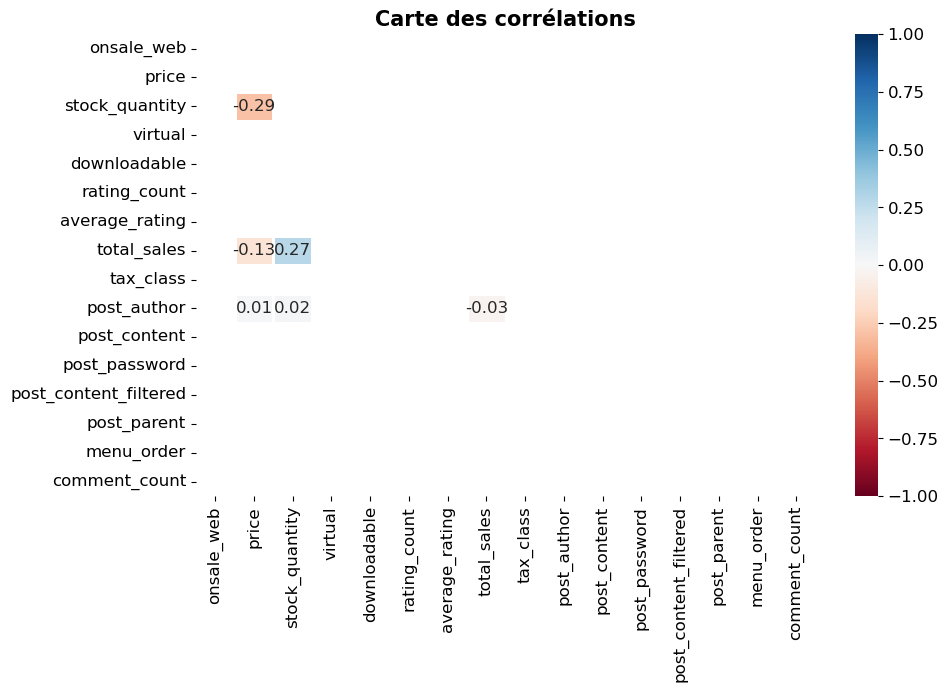

In [59]:
# Carte des corrélations

def plot_heatmap(data):
    cor_map = data.corr()
    plt.rcParams.update({ "font.size" : 12})
    plt.figure(figsize = (10, 6))
    mask = np.triu(np.ones_like(cor_map, dtype=bool))
    sns.heatmap(cor_map, mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Carte des corrélations', fontsize=15, fontweight="bold")
    plt.show()

plot_heatmap(data_final)

# 3. Demandes de Laurent

## 3.1. Le chiffre d’affaires par produit

In [60]:
# Le chiffre d'affaire par produit
chiff_daff_prod = data_final.groupby(["product_id", "sku"])["total_sales", "price"].sum().sort_values(by = "price",ascending=False).reset_index()
chiff_daff_prod.head(5)

,product_id,sku,total_sales,price
0,4352,15940,5.0,225.0
1,5001,14581,0.0,217.5
2,5892,14983,3.0,191.3
3,4402,3510,13.0,176.0
4,5767,15185,0.0,175.0


In [61]:
# Création d'une nouvelle colonne pour calculer chiffre d'affaires par produit les ventes
chiff_daff_prod["total_CA"] = chiff_daff_prod["price"] * chiff_daff_prod["total_sales"]
chiff_daff_prod.sort_values(by = "total_sales",ascending=False).head(5)

,product_id,sku,total_sales,price,total_CA
138,4334,7818,96.0,49.0,4704.0
137,4144,1662,87.0,49.0,4263.0
484,4068,16416,62.0,16.6,1029.2
706,4200,16295,46.0,5.8,266.8
711,4172,16210,43.0,5.7,245.1


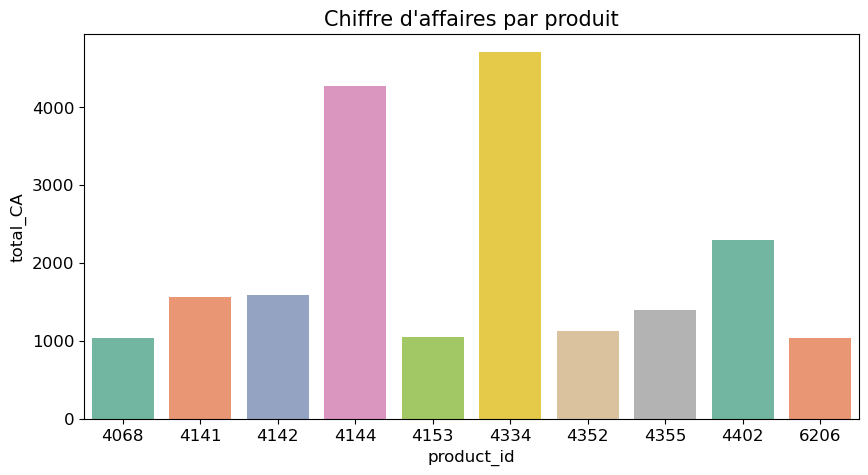

In [62]:
# Visualisation
plt.figure(figsize=(10, 5))
A = chiff_daff_prod[chiff_daff_prod["total_CA"] >= 1029.2]
sns.barplot(x = A["product_id"], y = A["total_CA"], data = A, palette="Set2")
plt.title("Chiffre d'affaires par produit", fontsize = "15")
plt.show()

## 3.2. Le total du chiffre d’affaires réalisé en ligne

In [63]:
# Total du chiffre d'affaires réalisées en lignes
Tot_chiff_daff_lign = chiff_daff_prod["total_CA"].sum()
print(f" Le total du chiffre d’affaires réalisé en ligne est de : {Tot_chiff_daff_lign} euros")

 Le total du chiffre d’affaires réalisé en ligne est de : 70568.6 euros


#### On a 70 568.6 euros comme total du chiffre d'affaires réalisé en ligne.

## 3.3. Analyse du prix des produits

### 3.3.1. Détection des outliers avec la méthode interquartile

* D'après Laurent qui demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. Il aimerait que j'effectue une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.
* Pour celà il existe plusieurs méthodes de détections des valeurs abérrabtes selon la methode de la gamme interquartile (IQR).
* Une valeur est abérante si:
##### valeur < Q1-(EIQ*1.5)
##### ou si: valeur > Q3+(EIQ*1.5)
##### avec   EIQ= Q3-Q1
* Dans ce cas nous allons faire une visualisation avec le boxplot qui permet de détecter les valeurs abérrantes.

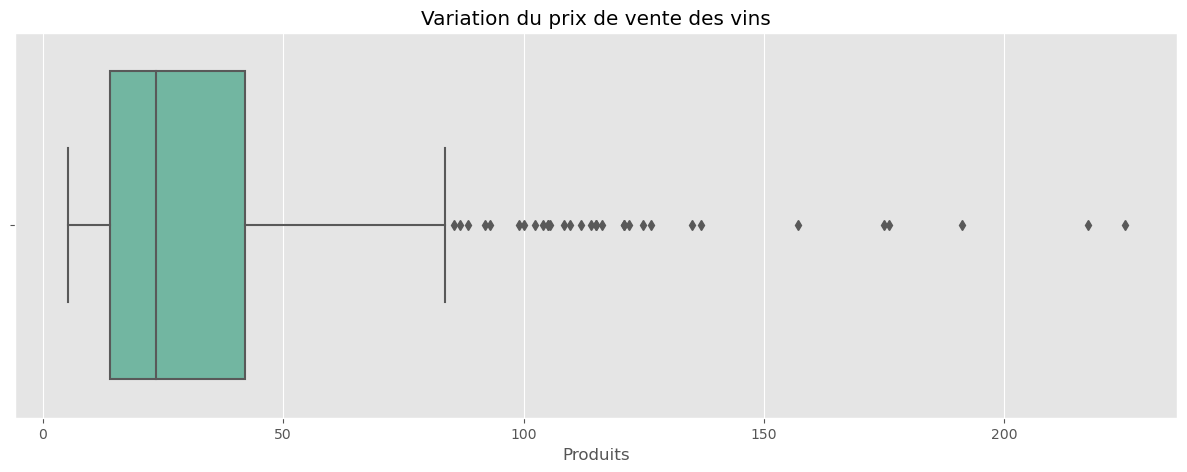

In [64]:
# visualisation des valeurs abérrantes avec un boxplot
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(15,5))
sns.boxplot(x = "price", data=data_final, showfliers = True,  palette = "Set2")
plt.xlabel("Produits")
plt.title("Variation du prix de vente des vins")
plt.show()

* On voit qu'on a pas mal d'outliers sur la partie supérieure, nous allons créer un sous dataset avec la présence uniquement des outliers (récupérer les outliers).

In [65]:
# Copier le dataset pour traiter les valeurs abérrantes
data1 = data_final.copy()
data2 = data_final.copy()

#### 3.3.1.a) Création d'une fonction pour récupérer les valeurs abérantes

In [66]:
# Création d'une fonction pour détecter les outliers
def detect_outliers(v):
    Q1 = np.quantile(v,0.25)
    Q3 = np.quantile(v,0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ * 1.5)
    LS = Q3 + (EIQ * 1.5)
    return v[(v < LI) | (v > LS)]   

In [67]:
# Appel à la fonction pour afficher la liste des outliers 
outliers1 =  pd.DataFrame(detect_outliers(data1["price"]))
print(outliers1.shape)
outliers1.head(5)

(32, 1)


,price
154,100.0
156,88.4
291,225.0
293,126.5
297,85.6


In [68]:
min1 = outliers1["price"].min()
max1 = outliers1["price"].max()
med1 = outliers1["price"].median()

In [69]:
print(min1)
print(max1)
print(med1)

85.6
225.0
114.5


https://psychometrie.espaceweb.usherbrooke.ca/score-z

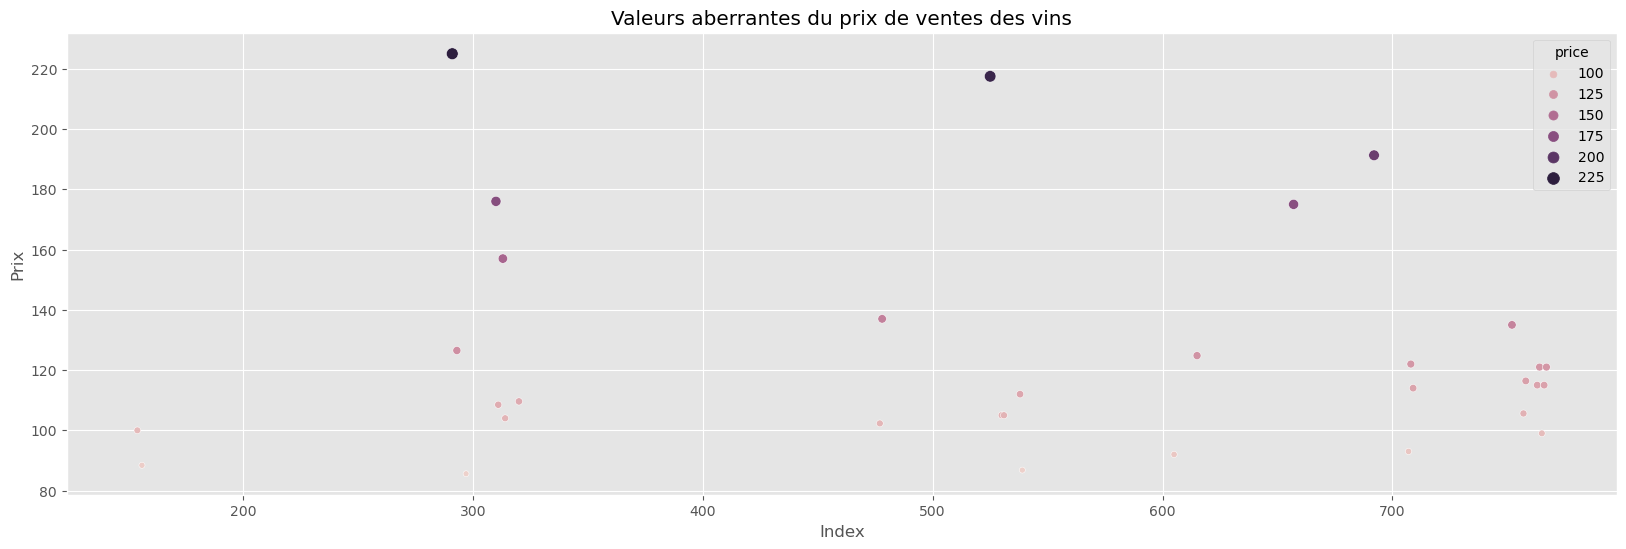

In [70]:
# visualisation des valeurs abérrantes avec les nuages de points
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(20,6))
sns.scatterplot(x = outliers1["price"].index, y = outliers1["price"].values
                , data=outliers1, hue = "price", size = "price")
plt.xlabel("Index")
plt.ylabel("Prix")
plt.title("Valeurs aberrantes du prix de ventes des vins")
plt.show()

#### 3.3.1.b) Création d'une fonction pour récupérer les valeurs non aberrantes

In [71]:
# Création d'une fonction pour détecter les non outliers
def sans_outliers(v):
    Q1 = np.quantile(v,0.25)
    Q3 = np.quantile(v,0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ * 1.5)
    LS = Q3 + (EIQ * 1.5)
    return v[(v > LI) & (v < LS)]  

In [72]:
# Appel à la fonction pour afficher la liste des non outliers
outliers2 =  pd.DataFrame(sans_outliers(data2["price"]))
print(outliers2.shape)
outliers2.head(5)

(682, 1)


,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0


In [73]:
min2 = outliers2["price"].min()
max2 = outliers2["price"].max()
med2 = outliers2["price"].median()

In [74]:
print(min2)
print(max2)
print(med2)

5.2
83.7
22.8


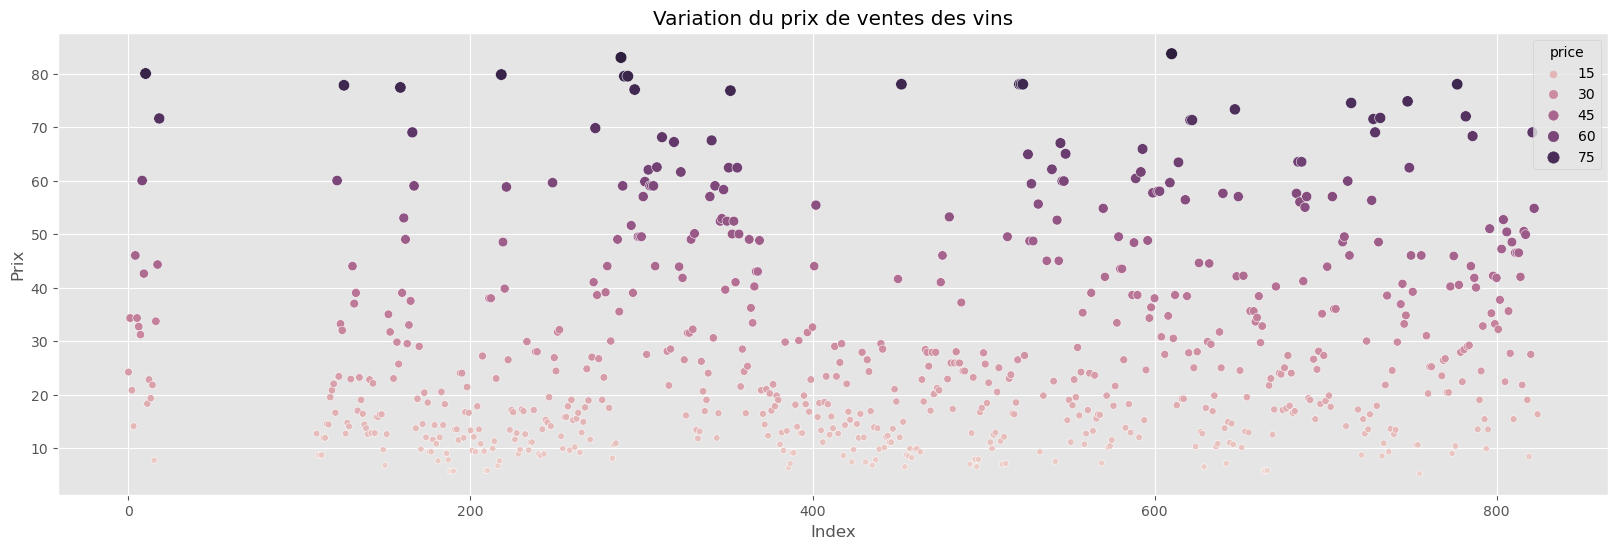

In [75]:
# visualisation des valeurs abérrantes avec les nuages de points
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(20,6))
sns.scatterplot(x = outliers2["price"].index, y = outliers2["price"].values
                , data=outliers2, hue = "price", size = "price")
plt.xlabel("Index")
plt.ylabel("Prix")
plt.title("Variation du prix de ventes des vins")
plt.show()

#### 3.3.1.c) Visualisation des deux sous dataset créer pour détecter les ou sans valeurs aberrantes

* Nous allons afficher dans un seul graphe le résultat obtenu après la création des deux sous dataset, une avec sans valeurs aberrantes et l'autre sans valeurs aberrantes.

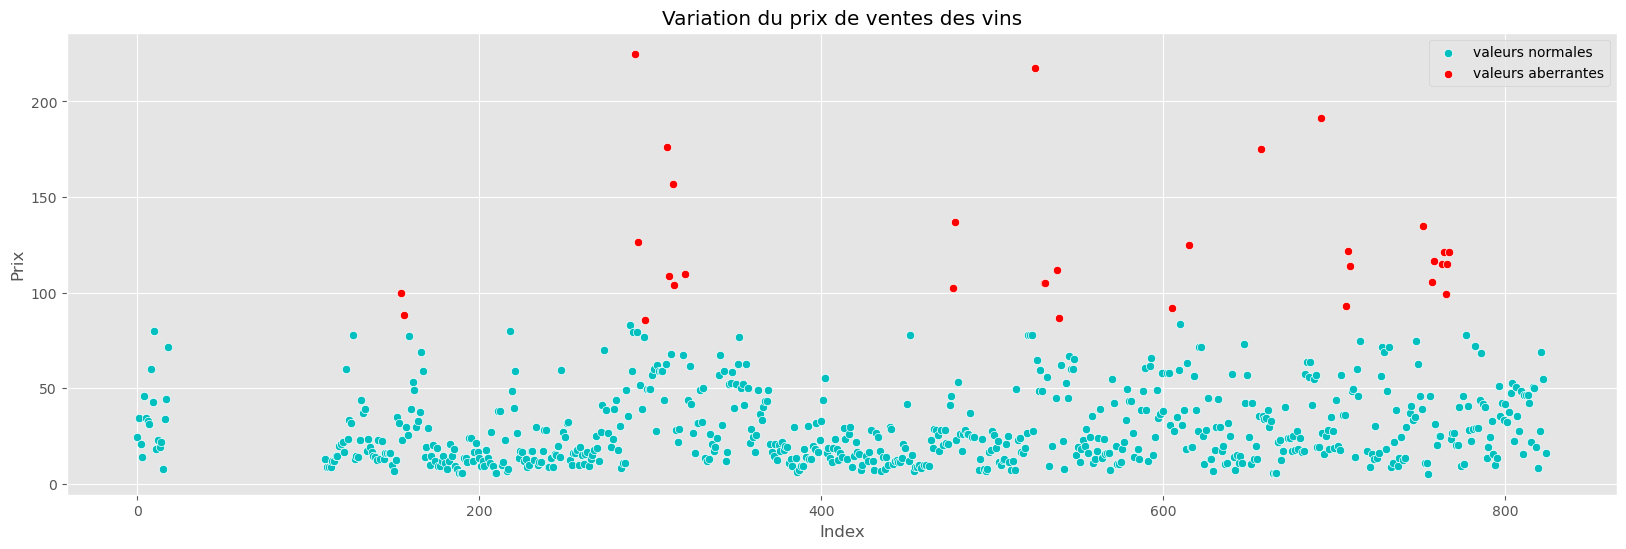

In [76]:
# visualisation des valeurs aberrantes et non aberrantes
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(20,6))
sns.scatterplot(x = outliers2["price"].index, y = outliers2["price"].values
                , data = outliers2, color = "c", label = "valeurs normales")
sns.scatterplot(x = outliers1["price"].index, y = outliers1["price"].values
                , data = outliers1, color = "r", label = "valeurs aberrantes")
plt.xlabel("Index")
plt.ylabel("Prix")
plt.legend()
plt.title("Variation du prix de ventes des vins")
plt.show()

*  Dans la visualisation on représente en rouge les outliers et en vert les prix normales de vin.

* On remarque toujours la présence des outliers.
* Après cette détection des outliers , on peut soit les transformer, les remplacer, les supprimer, soit les traiter avec un modèle à part.

Source: https://www.alliage-ad.com/data-science/data-science-et-assurance-valeurs-aberrantes/

### 3.3.2. Autre méthode de détecter les valeurs aberrantes appelée "Z SCORE"

* On essaye de calculer le score suivant: z_score = (i-mean)/std c'est à dire considérons " i " comme chaque prix de vins et chaque prix on va soustraire la moyenne du prix du vin  et divisé par l'écart type.
* C' est comme si on essaye de mesurer une distance par rapport au centre qui la moyenne.
* Ensuite on va essayer de voir si cette distance (z_score) est supérieure à une valeur

Source: https://pro.arcgis.com/fr/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm

Source : https://www.youtube.com/watch?v=Mkf7VFmTpHg

In [77]:
# Détecter les valeurs aberrantes en utilisant Z_score

# Définir une liste dans lequel on va ajouter les outliers
# On récupère la colonne price sous la forme d'une serie Pandas
price = data_final['price']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(data):
    threshold = 2
    mean = np.mean(data)
    std = np.std(data)
    
    # parcourir les données pour mesurer les z_score pour chaque i
    for i in data:
        z_score = (i - mean)/std
    # faire une comparaison de la valeur absolue de ce score(risque de négatif) 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [78]:
# Appel à la fonction pour afficher les valeurs aberrantes
priceOutliers = detectOutlier(price)
print(f"Nombre d'outliers détectés est de : {len(priceOutliers)} ")
print(priceOutliers)

Nombre d'outliers détectés est de : 30 
[100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


* Comme on a plus de 700 produits , donc je préfère garder la méthode interquartile (plus de valeurs aberrantes) pour détecter les valeurs abérrantes vue le résultat pour chacune des méthodes.